In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import random_noise

(256, 256)

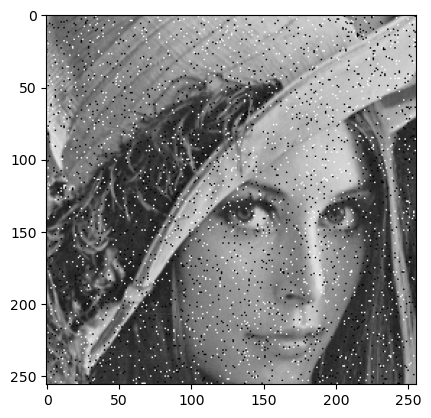

In [ ]:
# Carregando a imagem
img = imread('mulher-ruido.png')
plt.imshow(img, cmap='gray')

img.shape

In [ ]:
def imagemProcessada(imagem, a, b, borda):
    imagem_processada = None
    
    if borda == 'ignore':
        imagem_processada = np.delete(np.zeros(imagem.shape), range(a*2), axis=0)
        imagem_processada = np.delete(imagem_processada, range(b*2), axis=1)
    elif borda in ('espelho', 'zero', 'replicar'):
        imagem_processada = np.zeros(imagem.shape)
        
    return imagem_processada

In [ ]:
# def trataBordas(imagem, a, b, borda='ignore'):
#     imagem_bordas_tratadas = None
    
#     quantidades = (a, b)

#     if borda == 'ignore':
#         imagem_bordas_tratadas = imagem.copy()
#     elif borda in ('espelho', 'zero', 'replicar'):
#         imagem_bordas_tratadas = np.insert(np.zeros(imagem.shape), range(a*2), [0], axis=0)
#         imagem_bordas_tratadas = np.insert(imagem_bordas_tratadas, range(b*2), [0], axis=1)
        
#         imagem_bordas_tratadas[a:imagem.shape[0]+a, b:imagem.shape[1]+b] = imagem.copy()
        
#         if borda in ('espelho', 'replicar'):
#             for i_img, i_img_bordas in ((0, 0), (imagem.shape[0]-1, imagem.shape[0]+a)):
#                 for j_img, j_img_bordas in ((0, 0), (imagem.shape[1]-1, imagem.shape[1]+b)):
#                     imagem_bordas_tratadas[i_img_bordas:i_img_bordas+a, j_img_bordas:j_img_bordas+b] = imagem[i_img, j_img]
            
#             if borda == 'espelho':
#                 for i in range(a):
#                     imagem_bordas_tratadas[a-i-1, b:imagem.shape[1]+b] = imagem[i, :]
#                     imagem_bordas_tratadas[imagem.shape[0]+a+i, b:imagem.shape[1]+b] = imagem[imagem.shape[0]-1-i, :]
                
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
#                 for i in range(b):
#                     imagem_bordas_tratadas[b-i-1, a:imagem.shape[0]+a] = imagem[:, i]
#                     imagem_bordas_tratadas[imagem.shape[1]+b+i, a:imagem.shape[0]+a] = imagem[:, imagem.shape[1]-1-i]
            
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
#             elif borda == 'replicar':
#                 imagem_bordas_tratadas[0:a, b:imagem.shape[1]+b] = imagem[0, :]
#                 imagem_bordas_tratadas[imagem.shape[0]+a:imagem.shape[0]+a+a, b:imagem.shape[1]+b] = imagem[-1, :]
                
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
#                 imagem_bordas_tratadas[0:b, a:imagem.shape[0]+a] = imagem[:, 0]
#                 imagem_bordas_tratadas[imagem.shape[1]+b:imagem.shape[1]+b+b, a:imagem.shape[0]+a] = imagem[:, -1]
            
#                 imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
#     return imagem_bordas_tratadas

In [ ]:
def trataBordas(imagem, a, b, borda='ignore'):
    imagem_bordas_tratadas = None
    
    quantidades = (a, b)

    if borda == 'ignore':
        imagem_bordas_tratadas = imagem.copy()
    elif borda in ('espelho', 'zero', 'replicar'):
        imagem_bordas_tratadas = np.insert(np.zeros(imagem.shape), range(a*2), [0], axis=0)
        imagem_bordas_tratadas = np.insert(imagem_bordas_tratadas, range(b*2), [0], axis=1)
        
        imagem_bordas_tratadas[a:imagem.shape[0]+a, b:imagem.shape[1]+b] = imagem.copy()
        
        if borda in ('espelho', 'replicar'):
            if borda == 'espelho':
                for i in range(a):
                    imagem_bordas_tratadas[a-i-1, b:imagem.shape[1]+b] = imagem[i, :]
                    imagem_bordas_tratadas[imagem.shape[0]+a+i, b:imagem.shape[1]+b] = imagem[imagem.shape[0]-1-i, :]
                
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
                for i in range(b):
                    imagem_bordas_tratadas[b-i-1, :] = imagem_bordas_tratadas[a+i, :]
                    imagem_bordas_tratadas[imagem.shape[1]+b+i, :] = imagem_bordas_tratadas[imagem.shape[1]+a-i, :]
            
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
            elif borda == 'replicar':
                imagem_bordas_tratadas[0:a, b:imagem.shape[1]+b] = imagem[0, :]
                imagem_bordas_tratadas[imagem.shape[0]+a:imagem.shape[0]+a+a, b:imagem.shape[1]+b] = imagem[-1, :]
                
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
                imagem_bordas_tratadas[0:b, :] = imagem_bordas_tratadas[b, :]
                imagem_bordas_tratadas[imagem.shape[1]+b:imagem.shape[1]+b+b, :] = imagem_bordas_tratadas[imagem.shape[1]+b-1, :]
            
                imagem_bordas_tratadas = imagem_bordas_tratadas.T
                
    return imagem_bordas_tratadas

In [ ]:
def aplicaConvolucaoNoCanal(canal, filtro, borda): 
    a = (filtro.shape[0] - 1)//2 # linhas
    b = (filtro.shape[1] - 1)//2 # colunas

    canal_processado = imagemProcessada(canal, a, b, borda)

    canal_bordas_tratadas = trataBordas(canal, a, b, borda)
        
    linha_fim = canal_bordas_tratadas.shape[0] - a
    coluna_fim = canal_bordas_tratadas.shape[1] - b

    for i in range(a, linha_fim):
        for j in range(b, coluna_fim):
            canal_processado[i-a, j-b] = (canal_bordas_tratadas[i-a: i+a+1, j-b:j+b+1] * filtro).sum()

    return canal_processado

In [ ]:
def convolucao(imagem, filtro, borda='ignore'): 
    if len(imagem.shape) == 2:
        imagem_processada = aplicaConvolucaoNoCanal(imagem, filtro, borda)  
    else:
        canais = imagem.shape[2]
    
        imagem_processada = aplicaConvolucaoNoCanal(imagem[:, :, 0], filtro, borda)  

        for canal in range(1, canais):
            imagem_processada = np.dstack((imagem_processada, aplicaConvolucaoNoCanal(imagem[:, :, canal], filtro, borda)))
        

    return imagem_processada.astype('int')

In [ ]:
filtro = np.ones((3, 3))

media = filtro*(1/(3*3))
gaussiano = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
    ])
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ])
laplaciano = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
    ])
emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
    ])
filters = np.array([media, gaussiano, sobel, laplaciano, emboss])

In [ ]:
bordas = ['ignore', 'zero', 'espelho', 'replicar']

In [ ]:
def make_convolutions(img, filter, bordas, figsize=(15, 15)):
    cmap = None
    if len(img.shape) == 2:
        cmap = 'gray'
    
    fig = plt.figure(figsize=figsize)
    fig.add_subplot(1, len(bordas) + 1, 1)
    plt.imshow(img, cmap=cmap)
    plt.title('original')

    for i in range(1, len(bordas) +1):
        fig.add_subplot(1, len(bordas) + 1, i+1)
        plt.imshow(convolucao(img, filter, bordas[i-1]), cmap=cmap)
        plt.title(bordas[i-1])

       

# Média



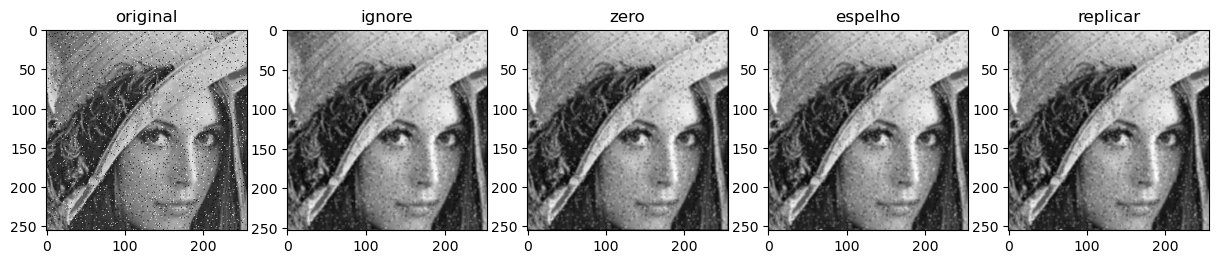

In [ ]:
make_convolutions(img, media, bordas)

# Gaussiano
É possivel observar uma suavização da imagens, removendo alguns ruído e detalhes indesejados.

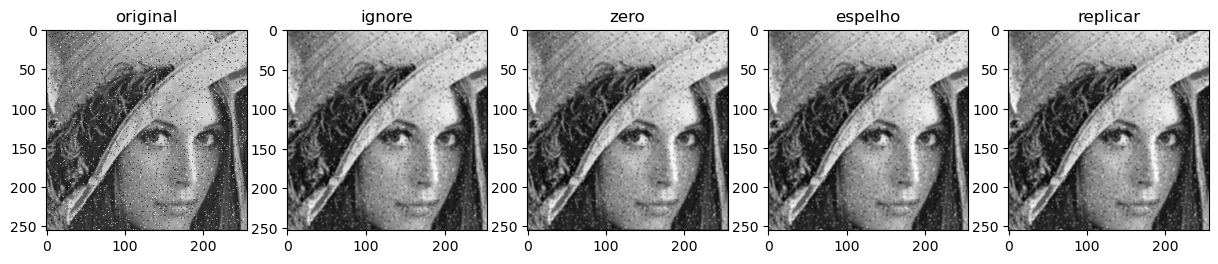

In [ ]:
make_convolutions(img, gaussiano, bordas)

# Sobel
Retona as descontinuidades presentes na imagem.

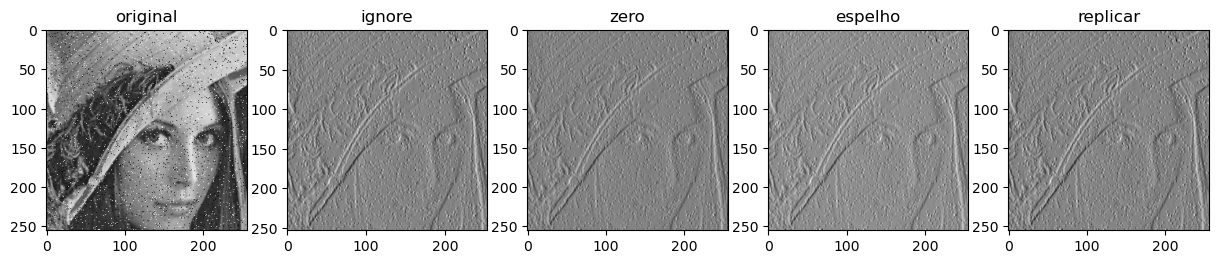

In [ ]:
make_convolutions(img, sobel, bordas)

# Laplaciano
Retona as descontinuidades presentes na imagem de forma menos nitida em comparação ao algortmo anterior.

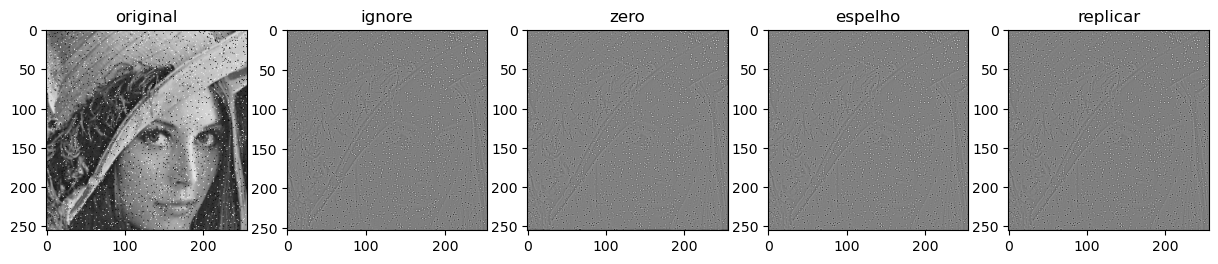

In [ ]:
make_convolutions(img, laplaciano, bordas)

# Emboss
Utilizado para dar uma sensação de profundidade na imagem.

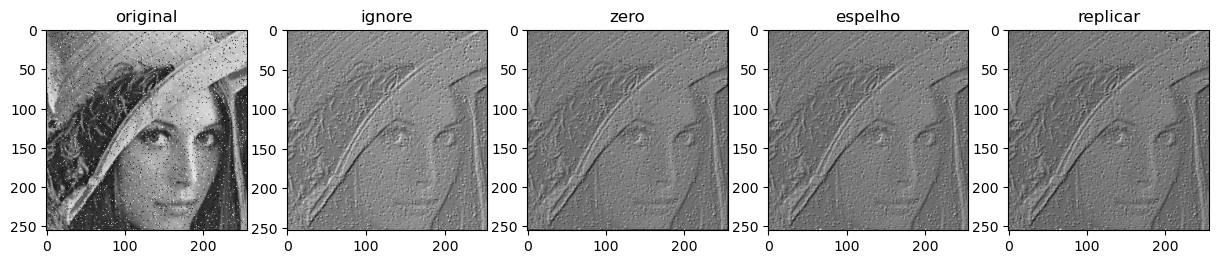

In [ ]:
make_convolutions(img, emboss, bordas)

## Filtros não lineares

(415, 640, 3)

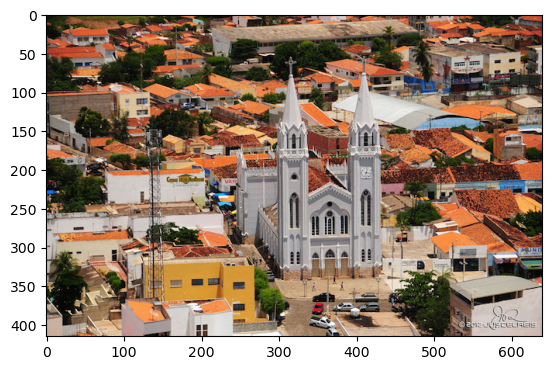

In [101]:
img = imread('picos.jpg')
plt.imshow(img)

img.shape

In [102]:
def aplicaFiltroNaoLinear(img, a, b, borda, filtro_nao_linear):
    imagem_processada = imagemProcessada(img, a, b, borda)

    imagem_bordas_tratadas = trataBordas(img, a, b, borda)
    
    for i in range(a, imagem_bordas_tratadas.shape[0] - a):
        for j in range(b, imagem_bordas_tratadas.shape[1] - b):
            imagem_processada[i - a][j - b] = filtro_nao_linear(imagem_bordas_tratadas[i - a:i + a + 1, j - b:j + b + 1])
            
    return imagem_processada

In [103]:
def calc_moda(kernel):
    vals, counts = np.unique(kernel, return_counts=True)

    maior_quantidade = counts.max()

    modas = vals[counts == maior_quantidade]
    
    return modas.mean()

In [104]:
def no_linear_filters(img, tamanho_kernel, borda='ignore', filter_name='median'):
    a = (tamanho_kernel[0] - 1) // 2
    b = (tamanho_kernel[1] - 1) // 2

    filtros = {'median': np.median, 'moda': calc_moda, 'max': np.max, 'min': np.min}

    if len(img.shape) == 2: 
        imagem_processada = aplicaFiltroNaoLinear(img, a, b, borda, filtros[filter_name])
    else:
        canais = img.shape[2]
        
        imagem_processada = aplicaFiltroNaoLinear(img[:, :, 0], a, b, borda, filtros[filter_name])

        for canal in range(1, canais):
            imagem_processada = np.dstack((imagem_processada, aplicaFiltroNaoLinear(img[:, :, canal], a, b, borda, filtros[filter_name])))

    return imagem_processada.astype(np.uint8)

In [105]:
filtros_nao_lineares = ['median', 'moda', 'max', 'min']
imagens = {'original': img}

tamanho_kernel = (3, 3)

for filtro in filtros_nao_lineares:
    imagens["Imagem " + filtro] = no_linear_filters(img, tamanho_kernel, borda='zero', filter_name=filtro)

In [106]:
def plotar_imagens(imagens):
    fig = plt.figure(figsize=(15, 15))
    for i, (titulo, img) in enumerate(imagens.items()):
        fig.add_subplot(1, 5, i + 1)
        plt.title(titulo)
        plt.imshow(img, cmap='gray')

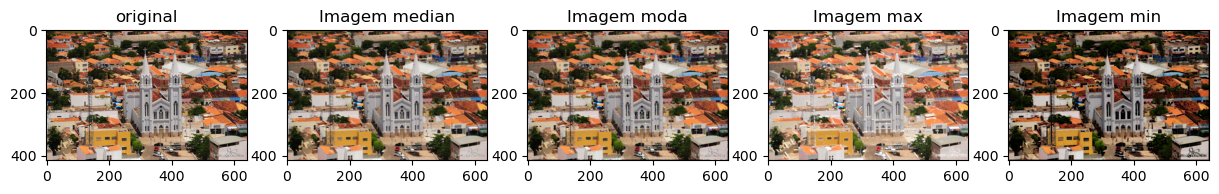

In [107]:
plotar_imagens(imagens)

## Aplicando filtros da media e mediana em uma imagem ruidosa

In [ ]:
img_com_ruido = imread('mulher-ruido.png')

In [ ]:
imagem_mediana = no_linear_filters(img_com_ruido, np.ones((3,3)), borda='zero', filter='median')
imagem_media = convolucao(img_com_ruido, media, borda='zero')

In [ ]:
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(img_com_ruido, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.title('Imagem Media')
plt.imshow(imagem_media, cmap='gray')
fig.add_subplot(1, 3, 3)
plt.title('Imagem Mediana')
plt.imshow(imagem_mediana, cmap='gray')

In [ ]:
imagem_media.max()

## Realce de imagem com fialtro laplaciano

(299, 299)

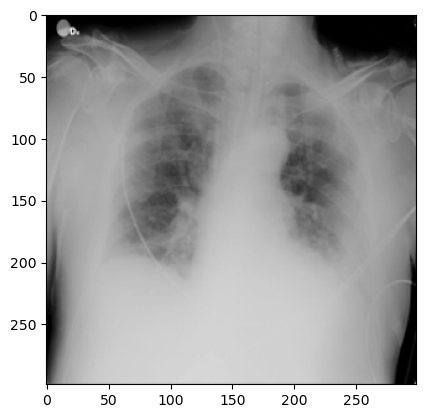

In [92]:
# Carregando a imagem
img = imread('COVID-1.png', as_gray=True)
plt.imshow(img, cmap='gray')

img.shape# Carregando a imagem

In [93]:
laplace = np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1]
            ])

In [94]:
img_laplace = convolucao(img, laplace, borda='espelho')

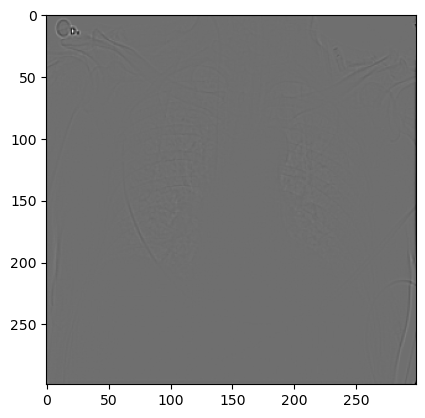

In [95]:
plt.imshow(img_laplace, cmap='gray')

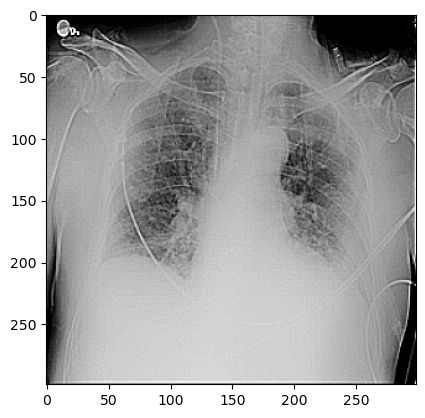

In [96]:
img_detalhada = img + (-1 * img_laplace)

img_detalhada[img_detalhada < 0] = 0
img_detalhada[img_detalhada > 255] = 255

plt.imshow(img_detalhada, cmap='gray')

Resultado: foi destacadas a as regiões de descontinuidade.

# Máscara de nitidez com filtragem high-boost

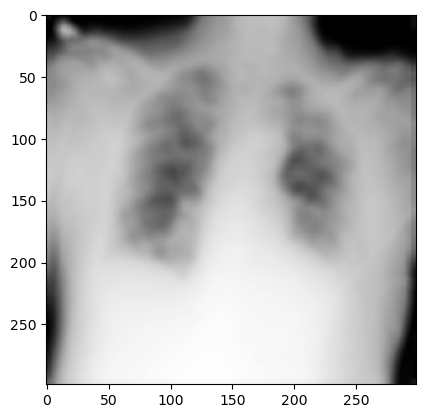

In [97]:
img = imread('COVID-1.png', as_gray=True)

# Suavização com filtro da media
media = np.ones((9, 9)) * (1/81)
img_borrada = convolucao(img, media, borda='espelho')
plt.imshow(img_borrada, cmap='gray')

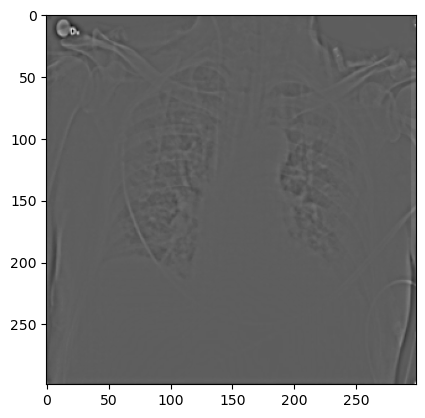

In [98]:
# Criando a máscara de nitidez
mascara = img - img_borrada
plt.imshow(mascara, cmap='gray')

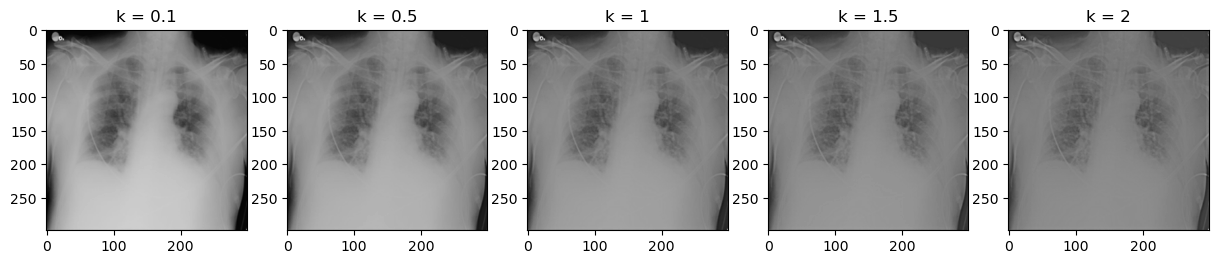

In [99]:
valores = [0.1, 0.5, 1, 1.5, 2]

fig = plt.figure(figsize=(15, 15))

for i, k in enumerate(valores):
    image_high_boost = img + (k * mascara)

    fig.add_subplot(1, 5, i+1)

    plt.title('k = ' + str(k))

    plt.imshow(image_high_boost, cmap='gray')

Resultado: Quanto maior o valor do k, maior sera a contribuição da máscara de nitidez na imagem aresultante.